우리나라 전국 각지에 위치한 공원 수와 비율을 파악하고 경기도 공원의 수와 총 면적에 대해 분석해보자

[할 일]
지역별(제공기관명)공원 수
공원구분 비율
공원면적 별 비율

In [1]:
import pandas as pd
import numpy as np
import folium
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import set_matplotlib_formats

%matplotlib inline

set_matplotlib_formats('retina')

plt.rc('font',family='Malgun Gothic')
plt.rc('axes',unicode_minus=False)

In [2]:
df = pd.read_csv('./data/전국도시공원표준데이터.csv', encoding='cp949')
df.head()

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,Unnamed: 19
0,42790-00004,화천 어린이공원1,어린이공원,강원도 화천군 화천읍 아리 256-1번지 일원,강원도 화천군 화천읍 아리 256-1번지 일원,38.105568,127.707075,1048.0,NaN,"그네, 미끄럼틀등",NaN,NaN,NaN,1985-06-05,강원도 화천군청,033-440-2467,2018-08-10,4310000,강원도 화천군,NaN
1,42790-00004,화천 어린이공원3,어린이공원,강원도 화천군 산수화로5길 24-5,강원도 화천군 화천읍 중리 191-25번지 일원,38.108973,127.708868,1760.0,NaN,NaN,NaN,NaN,NaN,1985-06-05,강원도 화천군청,033-440-2467,2018-08-10,4310000,강원도 화천군,NaN
2,42790-00004,화천 어린이공원4,어린이공원,강원도 화천군 산천어길 206,강원도 화천군 화천읍 신읍리 658-4번지 일원,38.114549,127.702736,1511.0,NaN,NaN,NaN,NaN,NaN,1985-06-05,강원도 화천군청,033-440-2467,2018-08-10,4310000,강원도 화천군,NaN
3,42790-00008,화천 어린이공원8,어린이공원,강원도 화천군 산수화로8,강원도 화천군 화천읍 아리 244-10번지 일원,38.106931,127.706165,752.0,NaN,NaN,NaN,NaN,NaN,2010-08-27,강원도 화천군청,033-440-2467,2018-08-10,4310000,강원도 화천군,NaN
4,42790-00008,사내 어린이공원,어린이공원,강원도 화천군 사내면 사창리 969-4번지 일원,강원도 화천군 사내면 사창리 969-4번지 일원,38.069006,127.523321,1385.0,NaN,"그네, 미끄럼틀등",NaN,NaN,NaN,1998-12-14,강원도 화천군청,033-440-2467,2018-08-10,4310000,강원도 화천군,NaN


기본 정보 확인

In [3]:
df.columns

Index(['관리번호', '공원명', '공원구분', '소재지도로명주소', '소재지지번주소', '위도', '경도', '공원면적',
       '공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
       '공원보유시설(기타시설)', '지정고시일', '관리기관명', '전화번호', '데이터기준일자', '제공기관코드', '제공기관명',
       'Unnamed: 19'],
      dtype='object')

In [4]:
df.shape

(18889, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18889 entries, 0 to 18888
Data columns (total 20 columns):
관리번호            18889 non-null object
공원명             18889 non-null object
공원구분            18889 non-null object
소재지도로명주소        8885 non-null object
소재지지번주소         17763 non-null object
위도              18889 non-null float64
경도              18889 non-null float64
공원면적            18889 non-null float64
공원보유시설(운동시설)    5020 non-null object
공원보유시설(유희시설)    7356 non-null object
공원보유시설(편익시설)    5524 non-null object
공원보유시설(교양시설)    1249 non-null object
공원보유시설(기타시설)    3235 non-null object
지정고시일           16075 non-null object
관리기관명           18278 non-null object
전화번호            17842 non-null object
데이터기준일자         18889 non-null object
제공기관코드          18889 non-null object
제공기관명           18889 non-null object
Unnamed: 19     0 non-null float64
dtypes: float64(4), object(16)
memory usage: 2.9+ MB


In [6]:
df.isnull().sum()

관리번호                0
공원명                 0
공원구분                0
소재지도로명주소        10004
소재지지번주소          1126
위도                  0
경도                  0
공원면적                0
공원보유시설(운동시설)    13869
공원보유시설(유희시설)    11533
공원보유시설(편익시설)    13365
공원보유시설(교양시설)    17640
공원보유시설(기타시설)    15654
지정고시일            2814
관리기관명             611
전화번호             1047
데이터기준일자             0
제공기관코드              0
제공기관명               0
Unnamed: 19     18889
dtype: int64

In [7]:
df['Unnamed: 19'].value_counts()

Series([], Name: Unnamed: 19, dtype: int64)

In [8]:
del df['Unnamed: 19']
del df['소재지지번주소']
df.head()

,관리번호,공원명,공원구분,소재지도로명주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명
0,42790-00004,화천 어린이공원1,어린이공원,강원도 화천군 화천읍 아리 256-1번지 일원,38.105568,127.707075,1048.0,NaN,"그네, 미끄럼틀등",NaN,NaN,NaN,1985-06-05,강원도 화천군청,033-440-2467,2018-08-10,4310000,강원도 화천군
1,42790-00004,화천 어린이공원3,어린이공원,강원도 화천군 산수화로5길 24-5,38.108973,127.708868,1760.0,NaN,NaN,NaN,NaN,NaN,1985-06-05,강원도 화천군청,033-440-2467,2018-08-10,4310000,강원도 화천군
2,42790-00004,화천 어린이공원4,어린이공원,강원도 화천군 산천어길 206,38.114549,127.702736,1511.0,NaN,NaN,NaN,NaN,NaN,1985-06-05,강원도 화천군청,033-440-2467,2018-08-10,4310000,강원도 화천군
3,42790-00008,화천 어린이공원8,어린이공원,강원도 화천군 산수화로8,38.106931,127.706165,752.0,NaN,NaN,NaN,NaN,NaN,2010-08-27,강원도 화천군청,033-440-2467,2018-08-10,4310000,강원도 화천군
4,42790-00008,사내 어린이공원,어린이공원,강원도 화천군 사내면 사창리 969-4번지 일원,38.069006,127.523321,1385.0,NaN,"그네, 미끄럼틀등",NaN,NaN,NaN,1998-12-14,강원도 화천군청,033-440-2467,2018-08-10,4310000,강원도 화천군


In [9]:
df.shape

(18889, 18)

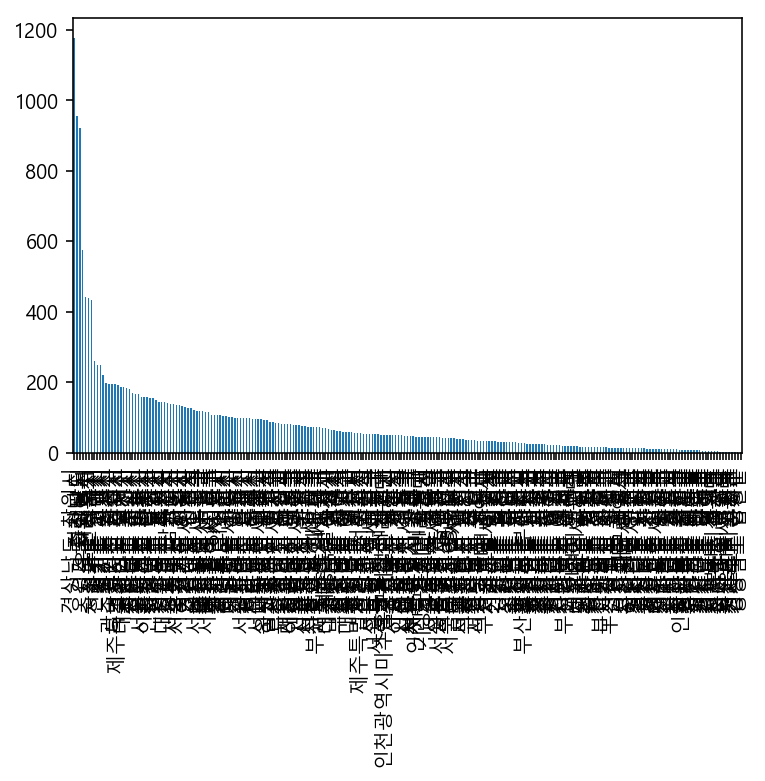

In [10]:
df['제공기관명'].value_counts().plot.bar()

전국 공원수가 무려 18889개.. 생각보다 너무 많음.. 물론 소/중구분을 더 해야겠지만 시각화하기도 너무 힘듬 --> 따라서 전처리과정 필요

In [11]:
df.describe(include='object')

,관리번호,공원명,공원구분,소재지도로명주소,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명
count,18889,18889,18889,8885,5020,7356,5524,1249,3235,16075,18278,17842,18889,18889,18889
unique,14833,12541,11,7048,1503,1253,1137,390,1017,3537,286,534,121,229,229
top,31110-60001,공원,어린이공원,전라남도 무안군 삼향읍 남악리 미지정 간척지,운동기구,조합놀이대,화장실,-,-,1990-06-22,경상남도 창원시청,055-212-4501,2019-01-01,5670000,경상남도 창원시
freq,124,146,10390,18,359,1557,1071,250,141,201,1176,344,1307,1176,1176


전처리 1 : 같은 공원이 다차례 등록된 경우가 있다. 예를들어 [전라남도 광양시] 와 [전라남도] 에서 각각 자료를 제공할 경우 같은 공원이라 할지라도 다중 등록되는데 '관리번호'와 '공원명', '공원면적'이 모두 같을 경우 하나로 중복 데이터들을 삭제하도록한다.

In [12]:
# 데이터 중복 확인하기
df['소재지도로명주소'].value_counts()

전라남도 무안군 삼향읍 남악리 미지정 간척지           18
전라남도 광양시 마동 21                      6
전라남도 무안군 삼향읍 남악지구 미지정 간척지           6
인천광역시 미추홀구 도화동 43-7                 5
경상남도 창원시 의창구 봉림동 475 일원 (531)       4
경상남도 창원시 성산구 성산패총로 2                4
경상남도 창원시 마산회원구 회성동 444-19번지 일원      4
경상남도 창원시 진해구 안골동 372                4
경상남도 창원시 진해구 남양동 378-2              4
경상남도 창원시 진해구 용원동 1336-2             4
경상남도 창원시 의창구 팔용동 130-5              4
경상남도 창원시 마산회원구 내서읍 중리 1057번지 일원     4
경상남도 창원시 의창구 대산면 일동리 921            4
경상남도 창원시 성산구 가음정동 114-4             4
경상남도 창원시 의창구 소답동 131-12             4
경상남도 창원시 의창구 신월동 23                 4
경상남도 창원시 성산구 성주동 177-1              4
경상남도 창원시 의창구 팔용동 182                4
경상남도 창원시 의창구 사림동 50                 4
경상남도 창원시 진해구 죽곡동 300 일원             4
경상남도 창원시 성산구 성주동 161                4
경상남도 창원시 성산구 성주동 172                4
경상남도 창원시 성산구 사파동 109-1              4
경상남도 창원시 성산구 성주동 167                4
경상남도 창원시 진해구 용원동 1341-3             4
경상남도 창원시 의창구 명서동 111-4              4
경상남도 창원시 진해구

In [13]:
# 데이터 중복 확인하기
df[df['소재지도로명주소']=='전라남도 무안군 삼향읍 남악리 미지정 간척지']

,관리번호,공원명,공원구분,소재지도로명주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명
2981,46840-00028,어린이공원,어린이공원,전라남도 무안군 삼향읍 남악리 미지정 간척지,34.814957,126.469957,1620.0,NaN,NaN,NaN,NaN,NaN,2005-12-13,전라남도 무안군,061-450-5587,2019-06-13,6460000,전라남도
2983,46840-00026,어린이공원,어린이공원,전라남도 무안군 삼향읍 남악리 미지정 간척지,34.814957,126.469957,1666.0,NaN,NaN,NaN,NaN,NaN,2005-12-13,전라남도 무안군,061-450-5587,2019-06-13,6460000,전라남도
2989,46840-00027,어린이공원,어린이공원,전라남도 무안군 삼향읍 남악리 미지정 간척지,34.814957,126.469957,1817.0,NaN,NaN,NaN,NaN,NaN,2005-12-13,전라남도 무안군,061-450-5587,2019-06-13,6460000,전라남도
2990,46840-00023,어린이공원,어린이공원,전라남도 무안군 삼향읍 남악리 미지정 간척지,34.814957,126.469957,2186.0,NaN,NaN,NaN,NaN,NaN,2005-12-13,전라남도 무안군,061-450-5587,2019-06-13,6460000,전라남도
2998,46840-00025,어린이공원,어린이공원,전라남도 무안군 삼향읍 남악리 미지정 간척지,34.814957,126.469957,3278.0,NaN,NaN,NaN,NaN,NaN,2005-12-13,전라남도 무안군,061-450-5587,2019-06-13,6460000,전라남도
2999,46840-00021,어린이공원,어린이공원,전라남도 무안군 삼향읍 남악리 미지정 간척지,34.814957,126.469957,4042.0,NaN,NaN,NaN,NaN,NaN,2005-12-13,전라남도 무안군,061-450-5587,2019-06-13,6460000,전라남도
3000,46840-00020,어린이공원,어린이공원,전라남도 무안군 삼향읍 남악리 미지정 간척지,34.814957,126.469957,4600.0,NaN,NaN,NaN,NaN,NaN,2005-12-13,전라남도 무안군,061-450-5587,2019-06-13,6460000,전라남도
3003,46840-00024,어린이공원,어린이공원,전라남도 무안군 삼향읍 남악리 미지정 간척지,34.814957,126.469957,6383.0,NaN,NaN,NaN,NaN,NaN,2005-12-13,전라남도 무안군,061-450-5587,2019-06-13,6460000,전라남도
3004,46840-00022,어린이공원,어린이공원,전라남도 무안군 삼향읍 남악리 미지정 간척지,34.814957,126.469957,6784.0,NaN,NaN,NaN,NaN,NaN,2005-12-13,전라남도 무안군,061-450-5587,2019-06-13,6460000,전라남도
12731,46840-00028,어린이공원,어린이공원,전라남도 무안군 삼향읍 남악리 미지정 간척지,34.811762,126.452986,1620.0,NaN,NaN,NaN,NaN,NaN,2005-12-13,전라남도 무안군,061-450-5587,2019-05-30,4950000,전라남도 무안군


In [14]:
# 데이터 중복 확인하기
df[df['소재지도로명주소']=='전라남도 광양시 마동 21']

,관리번호,공원명,공원구분,소재지도로명주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명
720,46230-00080,마동11,기타,전라남도 광양시 마동 21,34.949536,127.718791,800.0,NaN,스텝싸이클외 2종,NaN,NaN,NaN,NaN,광양시 공원녹지사업소,061-797-3729,2019-06-17,4840000,전라남도 광양시
721,46230-00081,마동12,기타,전라남도 광양시 마동 21,34.949536,127.718791,1300.0,NaN,NaN,NaN,NaN,NaN,NaN,광양시 공원녹지사업소,061-797-3729,2019-06-17,4840000,전라남도 광양시
742,46230-00103,와우생태호수공원,기타,전라남도 광양시 마동 21,34.949536,127.718791,81996.0,NaN,스텝싸이클외 2종,"주차장, 화장실",NaN,NaN,NaN,광양시 공원녹지사업소,061-797-3729,2019-06-17,4840000,전라남도 광양시
2678,46230-00080,마동11,기타,전라남도 광양시 마동 21,34.949505,127.718173,800.0,NaN,스텝싸이클외 2종,NaN,NaN,NaN,NaN,광양시 공원녹지사업소,061-797-3729,2019-06-13,6460000,전라남도
2679,46230-00081,마동12,기타,전라남도 광양시 마동 21,34.949505,127.718173,1300.0,NaN,NaN,NaN,NaN,NaN,NaN,광양시 공원녹지사업소,061-797-3729,2019-06-13,6460000,전라남도
2701,46230-00103,와우생태호수공원,기타,전라남도 광양시 마동 21,34.949505,127.718173,81996.0,NaN,스텝싸이클외 2종,"주차장, 화장실",NaN,NaN,NaN,광양시 공원녹지사업소,061-797-3729,2019-06-13,6460000,전라남도


In [15]:
df.shape

(18889, 18)

In [16]:
print(df.shape)
df = df.drop_duplicates(['관리번호','공원명','공원면적'])
print(df.shape)

(18889, 18)
(15737, 18)


약 3000개의 중복 데이터가 존재했음

In [17]:
# 제거 결과 확인
df[df['소재지도로명주소']=='전라남도 광양시 마동 21']

,관리번호,공원명,공원구분,소재지도로명주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명
720,46230-00080,마동11,기타,전라남도 광양시 마동 21,34.949536,127.718791,800.0,NaN,스텝싸이클외 2종,NaN,NaN,NaN,NaN,광양시 공원녹지사업소,061-797-3729,2019-06-17,4840000,전라남도 광양시
721,46230-00081,마동12,기타,전라남도 광양시 마동 21,34.949536,127.718791,1300.0,NaN,NaN,NaN,NaN,NaN,NaN,광양시 공원녹지사업소,061-797-3729,2019-06-17,4840000,전라남도 광양시
742,46230-00103,와우생태호수공원,기타,전라남도 광양시 마동 21,34.949536,127.718791,81996.0,NaN,스텝싸이클외 2종,"주차장, 화장실",NaN,NaN,NaN,광양시 공원녹지사업소,061-797-3729,2019-06-17,4840000,전라남도 광양시


전국 데이터 중 경기도만 가지고 분석해보자

In [18]:
df[df['소재지도로명주소'].str.contains('경기도', na=False)].shape

(1716, 18)

In [19]:
df_gg = df[df['소재지도로명주소'].str.contains('경기도', na=False)]
df_gg.head()

,관리번호,공원명,공원구분,소재지도로명주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명
1453,41500-00001,설봉공원,근린공원,경기도 이천시 경충대로 2709번길 128,37.279457,127.427553,1644940.0,축구장+배드민턴장+농구장,조합놀이대,주차장+매점+화장실,대공연장,암벽등반장,1976-12-07,경기도 이천시청,031-645-3844,2019-03-05,4070000,경기도 이천시
1454,41500-00002,온천공원,근린공원,경기도 이천시 애련정로 110-2,37.280266,127.450371,114600.0,축구장+배드민턴장+농구장,조합놀이대,주차장+화장실,대공연장,NaN,1976-12-07,경기도 이천시청,031-645-3844,2019-03-05,4070000,경기도 이천시
1455,41500-00003,수변공원,수변공원,경기도 이천시 경충대로 2422번길 17,37.268120,127.460527,12040.0,배드민턴장+족구장,조합놀이대,화장실,NaN,NaN,2009-09-14,경기도 이천시청,031-645-3844,2019-03-05,4070000,경기도 이천시
1456,41500-00004,심포니공원,어린이공원,경기도 이천시 서희로 82번길 46,37.282298,127.445778,2947.0,NaN,조합놀이대,NaN,NaN,NaN,1989-08-07,경기도 이천시청,031-645-3844,2019-03-05,4070000,경기도 이천시
1458,41500-00006,희망공원,어린이공원,경기도 이천시 설봉로 43번길 49,37.282096,127.436147,683.0,농구대,조합놀이대,NaN,NaN,NaN,1989-08-07,경기도 이천시청,031-645-3844,2019-03-05,4070000,경기도 이천시


In [20]:
df_gg['공원구분'].value_counts(normalize=True)

어린이공원     0.529720
근린공원      0.253497
소공원       0.127040
문화공원      0.029138
체육공원      0.025058
수변공원      0.020396
역사공원      0.011072
묘지공원      0.002914
도시자연공원    0.001166
Name: 공원구분, dtype: float64

In [21]:
a = pd.DataFrame(df_gg['공원구분'].value_counts())
a['비율'] = df_gg['공원구분'].value_counts(normalize=True)*100
a['평균 면적'] = df_gg.groupby('공원구분')['공원면적'].mean()
a.columns = ['공원 수', '공원 비율', '평균 면적']
a

,공원 수,공원 비율,평균 면적
어린이공원,909,52.972028,2.448005e+03
근린공원,435,25.349650,8.398923e+04
소공원,218,12.703963,1.623994e+03
문화공원,50,2.913753,3.568612e+04
체육공원,43,2.505828,4.659272e+04
수변공원,35,2.039627,3.420038e+04
역사공원,19,1.107226,1.507401e+05
묘지공원,5,0.291375,3.945972e+05
도시자연공원,2,0.116550,2.339715e+06


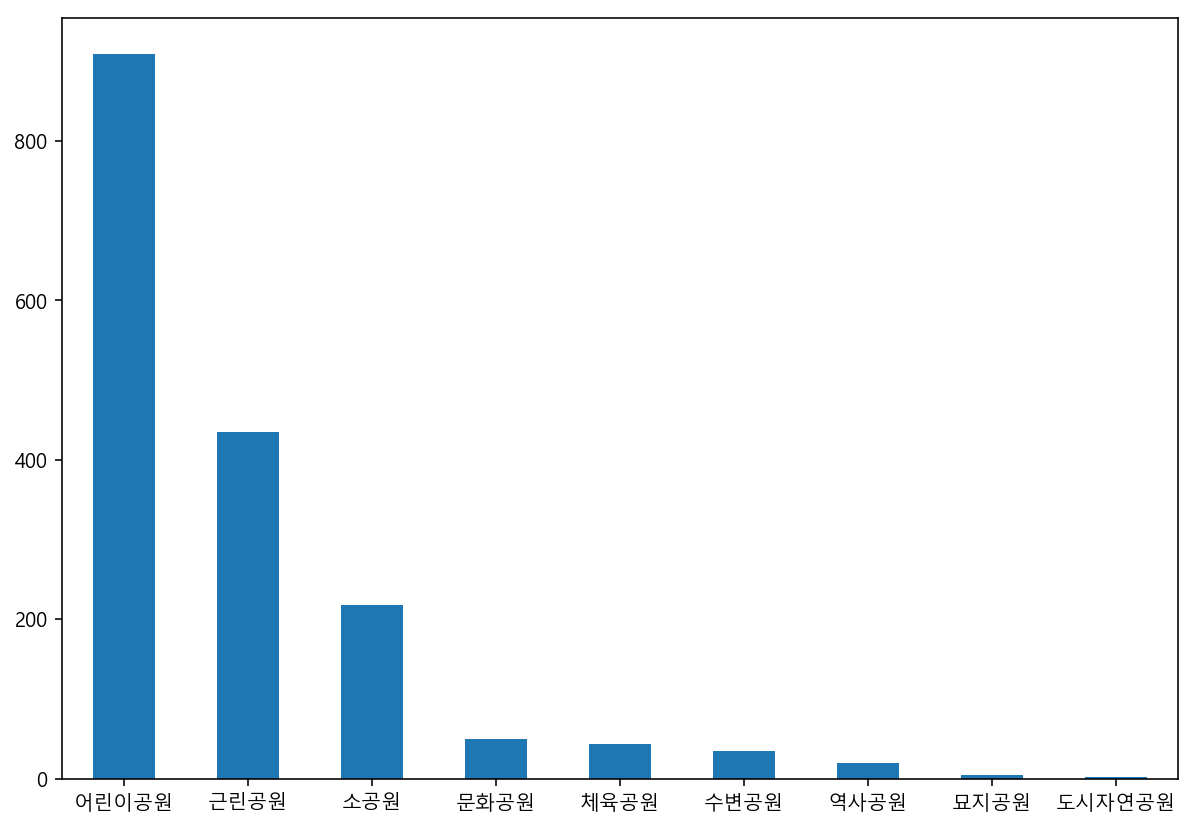

In [22]:
df_gg['공원구분'].value_counts().plot.bar(rot=0, figsize=(10,7))

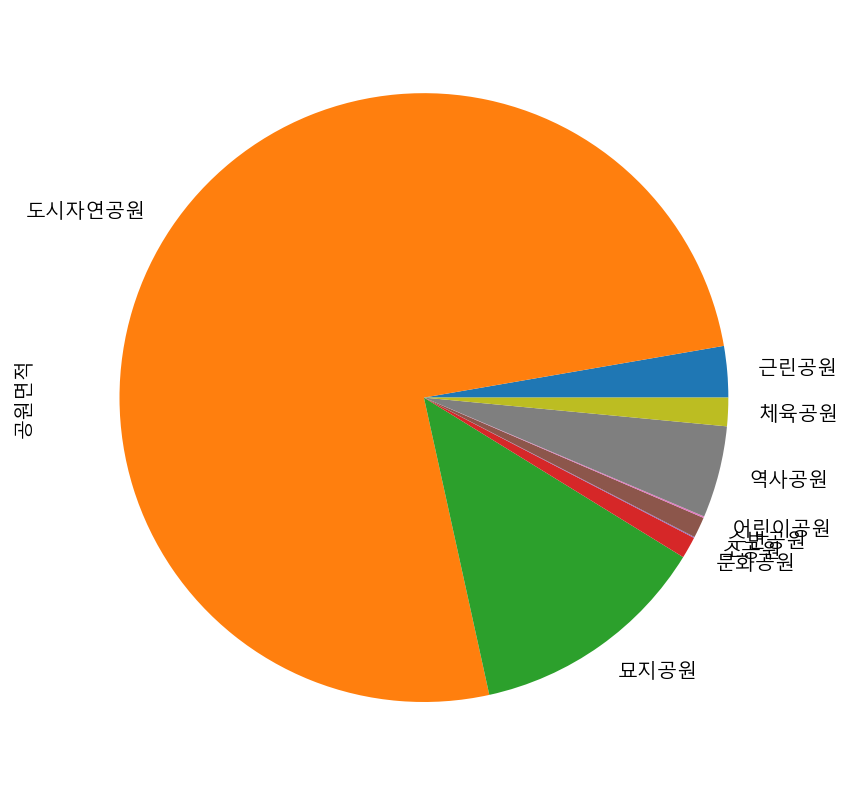

In [23]:
df_gg.groupby('공원구분')['공원면적'].mean().plot.pie(figsize=(7,7))

In [24]:
df_gg['공원구분'].value_counts()

어린이공원     909
근린공원      435
소공원       218
문화공원       50
체육공원       43
수변공원       35
역사공원       19
묘지공원        5
도시자연공원      2
Name: 공원구분, dtype: int64

In [26]:
df_gg['시군구분']=''

C:\Users\44455\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [27]:
df_gg['시군구분'] = df_gg['소재지도로명주소'].map(lambda x : x.split()[1])
df_gg.head()

C:\Users\44455\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,관리번호,공원명,공원구분,소재지도로명주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,시군구분
1453,41500-00001,설봉공원,근린공원,경기도 이천시 경충대로 2709번길 128,37.279457,127.427553,1644940.0,축구장+배드민턴장+농구장,조합놀이대,주차장+매점+화장실,대공연장,암벽등반장,1976-12-07,경기도 이천시청,031-645-3844,2019-03-05,4070000,경기도 이천시,이천시
1454,41500-00002,온천공원,근린공원,경기도 이천시 애련정로 110-2,37.280266,127.450371,114600.0,축구장+배드민턴장+농구장,조합놀이대,주차장+화장실,대공연장,NaN,1976-12-07,경기도 이천시청,031-645-3844,2019-03-05,4070000,경기도 이천시,이천시
1455,41500-00003,수변공원,수변공원,경기도 이천시 경충대로 2422번길 17,37.268120,127.460527,12040.0,배드민턴장+족구장,조합놀이대,화장실,NaN,NaN,2009-09-14,경기도 이천시청,031-645-3844,2019-03-05,4070000,경기도 이천시,이천시
1456,41500-00004,심포니공원,어린이공원,경기도 이천시 서희로 82번길 46,37.282298,127.445778,2947.0,NaN,조합놀이대,NaN,NaN,NaN,1989-08-07,경기도 이천시청,031-645-3844,2019-03-05,4070000,경기도 이천시,이천시
1458,41500-00006,희망공원,어린이공원,경기도 이천시 설봉로 43번길 49,37.282096,127.436147,683.0,농구대,조합놀이대,NaN,NaN,NaN,1989-08-07,경기도 이천시청,031-645-3844,2019-03-05,4070000,경기도 이천시,이천시


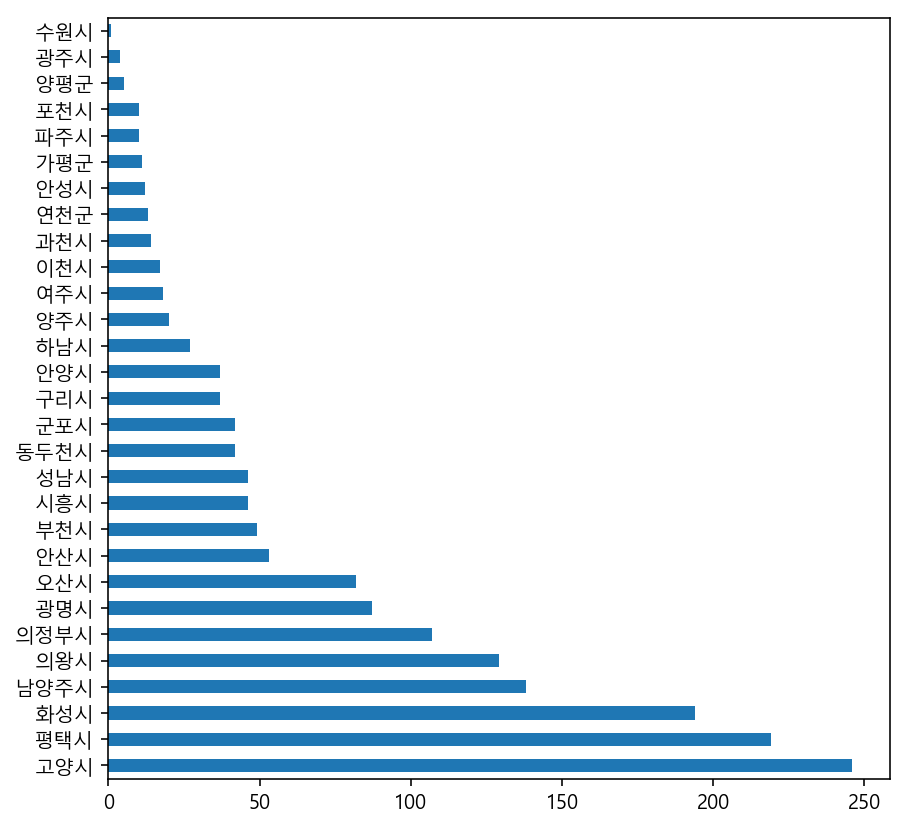

In [28]:
df_gg['시군구분'].value_counts().plot.barh(figsize=(7,7))

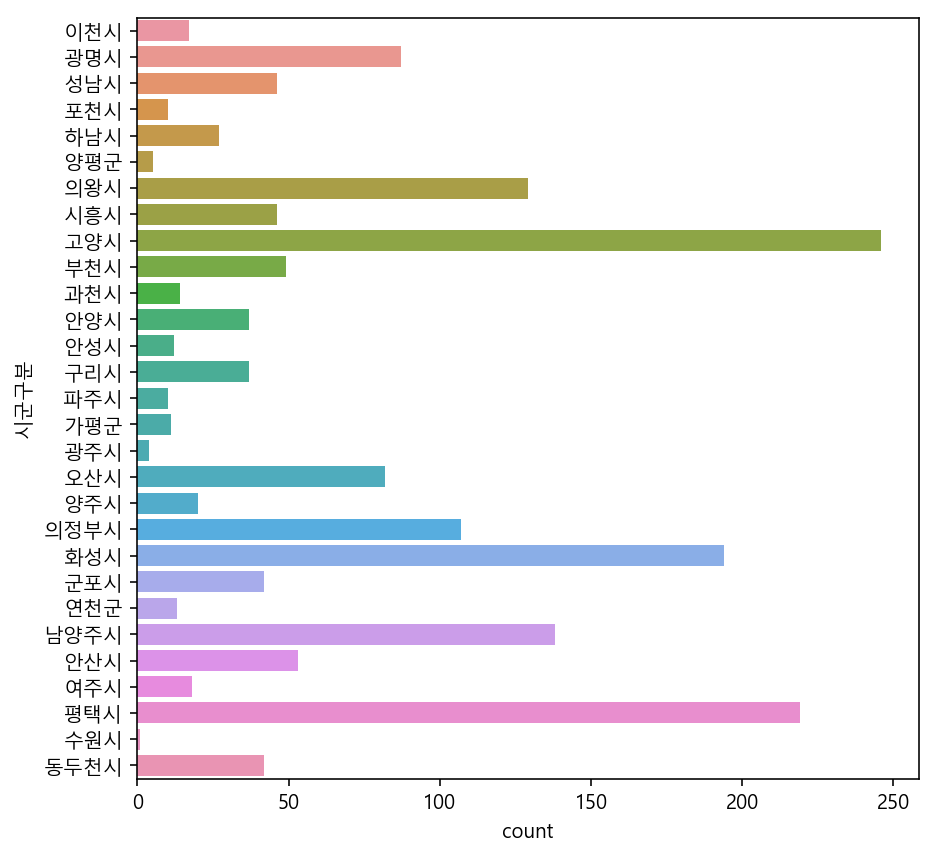

In [29]:
plt.figure(figsize=(7,7))
sns.countplot(y='시군구분',data=df_gg)

In [30]:
df_gg.groupby('시군구분')['공원면적'].sum().sort_values(ascending=False).head(10)

시군구분
성남시     9104686.8
고양시     7195744.0
동두천시    4763317.0
남양주시    4139588.0
화성시     3852760.0
평택시     3449078.8
광명시     3377201.0
의왕시     2274167.1
의정부시    2125775.5
이천시     1793917.0
Name: 공원면적, dtype: float64

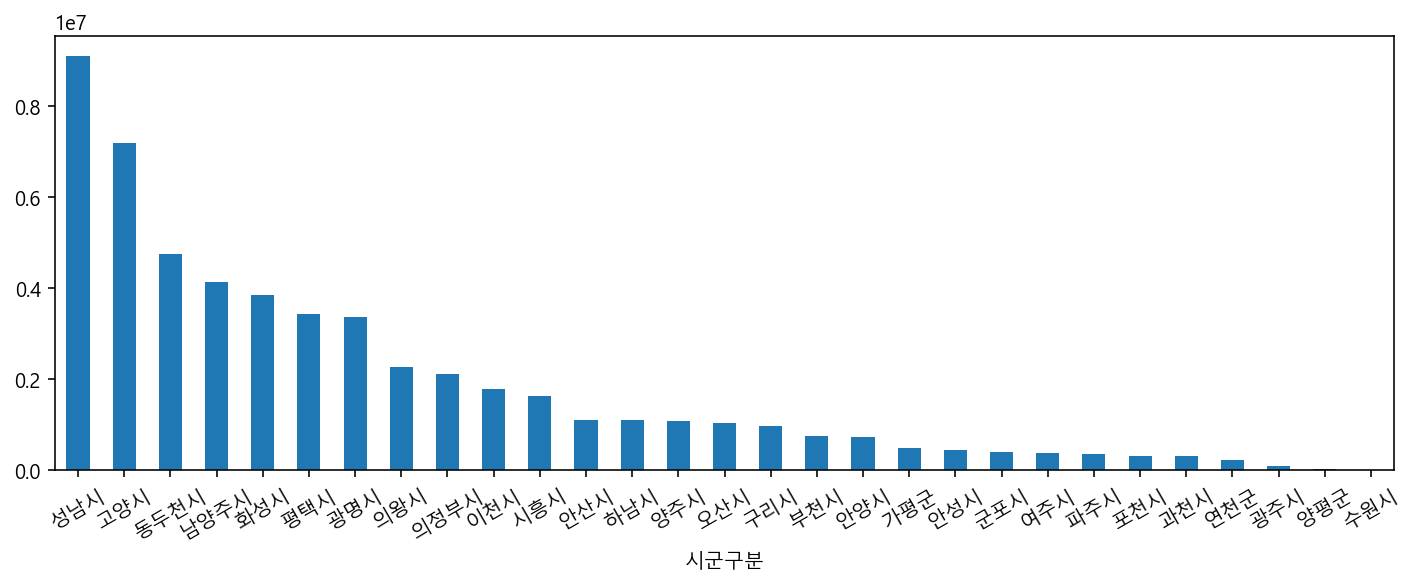

In [31]:
df_gg.groupby('시군구분')['공원면적'].sum().sort_values(ascending=False).plot.bar(rot=30, figsize=(12,4))

# ------- [추가] 우리 동네 공원 현황 --------

In [32]:
df[df['제공기관명']=='경기도 연천군']

,관리번호,공원명,공원구분,소재지도로명주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명
13429,41800-00004,망곡근린공원,근린공원,경기도 연천군 연천읍 읍내리 산1-1,38.102825,127.050876,10000.0,NaN,NaN,NaN,NaN,NaN,2006-10-16,경기도 연천군청,031-839-2346,2018-09-11,4140000,경기도 연천군
13430,41800-00003,전곡은대근린공원,근린공원,경기도 연천군 전곡읍 은대리 573,38.027372,127.044999,92960.0,NaN,NaN,NaN,NaN,NaN,2009-08-12,경기도 연천군청,031-839-2346,2018-09-11,4140000,경기도 연천군
13431,41800-00014,신서수변공원,수변공원,경기도 연천군 신서면 대광리 1318-42,38.187281,127.103777,5369.0,NaN,NaN,NaN,NaN,NaN,2014-06-12,경기도 연천군청,031-839-2346,2018-09-11,4140000,경기도 연천군
13432,41800-00013,고문리소공원,소공원,경기도 연천군 연천읍 고문리 891,38.060868,127.109992,3820.0,NaN,NaN,NaN,NaN,NaN,2006-10-16,경기도 연천군청,031-839-2346,2018-09-11,4140000,경기도 연천군
13433,41800-00011,군남소공원,소공원,경기도 연천군 군남면 옥계리 1259-9,38.131205,127.027808,15813.0,NaN,NaN,NaN,NaN,NaN,2006-10-16,경기도 연천군청,031-839-2061,2018-09-11,4140000,경기도 연천군
13434,41800-00010,연천어린이공원,어린이공원,경기도 연천군 연천읍 차탄리 624,38.100577,127.059801,4534.0,NaN,NaN,NaN,NaN,NaN,2003-12-01,경기도 연천군청,031-839-2346,2018-09-11,4140000,경기도 연천군
13435,41800-00009,휴먼시아어린이공원,어린이공원,경기도 연천군 전곡읍 전곡리 237-14,38.017861,127.053574,2230.0,NaN,NaN,NaN,NaN,NaN,2006-10-16,경기도 연천군청,031-839-2346,2018-09-11,4140000,경기도 연천군
13436,41800-00008,조흥어린이공원,어린이공원,경기도 연천군 전곡읍 전곡리 263-3,38.019836,127.052224,1523.0,NaN,NaN,NaN,NaN,NaN,2003-12-01,경기도 연천군청,031-839-2346,2018-09-11,4140000,경기도 연천군
13437,41800-00007,명정어린이공원,어린이공원,경기도 연천군 전곡읍 전곡리 411-11,38.032110,127.055217,1500.0,NaN,NaN,NaN,NaN,NaN,2003-12-01,경기도 연천군청,031-839-2346,2018-09-11,4140000,경기도 연천군
13438,41800-00006,현가근긴공원,근린공원,경기도 연천군 연천읍 현가리 57-1,38.109421,127.060788,11452.0,NaN,NaN,NaN,NaN,NaN,2006-05-15,경기도 연천군청,031-839-2346,2018-09-11,4140000,경기도 연천군
